In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
from collections import Counter

# 1.Importing training dataset

In [8]:
train_data = pd.read_csv("titanic_dataset/train.csv")

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# 2.Finding outlier in training dataset

In [11]:
def outlier(df,n,features):
    outlier_indices=[]
    
    for col in features:
        #1st quartile(25%)
        Q1 = np.percentile(df[col],25)
        #3rd quartile(75%)
        Q3 = np.percentile(df[col],75)
        #InterQuatile Range
        IQR=Q3-Q1
        
        outlier_border =IQR*1.5
        #determinining outlier columns
        outlier_column_list =df[(df[col]<Q1-outlier_border)|(df[col]>Q3+outlier_border)].index
        outlier_indices.extend(outlier_column_list)
    outlier_indices = Counter(outlier_indices)
    multiple_outlier = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outlier
        

In [12]:
outlier_to_drop = outlier(train_data,2,["Age","SibSp","Parch","Fare"])

/home/anish/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [13]:
outlier_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [14]:
train_data.loc[outlier_to_drop]

PassengerId  Survived  Pclass                               Name     Sex  \
27            28         0       1     Fortune, Mr. Charles Alexander    male   
88            89         1       1         Fortune, Miss. Mabel Helen  female   
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
341          342         1       1     Fortune, Miss. Alice Elizabeth  female   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

      Age  SibSp  Parch    Ticket    Fare        Cabin Embarked  
27   19.0      3      2     19950  263.00  C23 C25 C27        S  
88   23.0      3      2     19950  263.00  C23 C25 C27        S  
159   NaN      8      2  CA. 2343   69.55          NaN        S  
180   NaN      8      2  CA. 2343   69.55          NaN        S  
201   NaN      8      2  CA. 2343   69.55          NaN        S  
324   NaN      8      2  CA. 2343   69.55          NaN        S  
341  24.0      3      2     19950  263.00  C23 C25 C27        S  
792   NaN      8      2  CA. 2343   69.55          NaN        S  
846   NaN      8      2  CA. 2343   69.55          NaN        S  
863   NaN      8      2  CA. 2343   69.55          NaN        S

"AS we can see that in Sibling spouse columns there is an outlier who has having 8 sibling and spouse which is very odd relative to the data,similarly where sibling spouse are small in number  the fare of the ticket is exorbitantly high.Hence both comes under outlier" 

In [15]:
train_data = train_data.drop(outlier_to_drop,axis=0).reset_index(drop=True)

In [16]:
def null_count(df):
    missing_data = df.isnull().sum()
    missing_data =missing_data[missing_data>0].sort_values(ascending = False)
    percentage_of_null =missing_data*100/len(df)
    features_index = missing_data.index
    values =list(missing_data)
    percent_values = list(percentage_of_null)
    val_df =pd.DataFrame(data=values,index=features_index,columns=['null_count'])
    val_df['Null_percent'] = percent_values
    plt.figure(figsize=(10,10))
    sns.barplot(x=features_index,y=val_df['null_count'])
    plt.title("Total missing value by columns")
    return plt,val_df
    

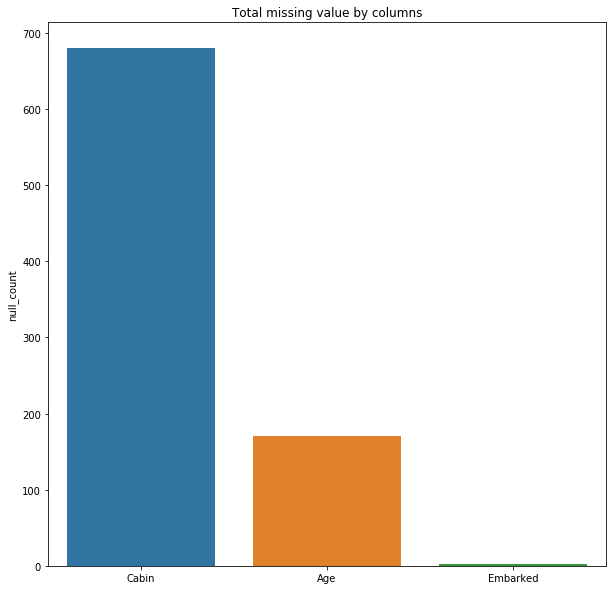

In [17]:
plt,val=null_count(train_data)

In [18]:
val

null_count  Null_percent
Cabin            680     77.185017
Age              170     19.296254
Embarked           2      0.227015

"Exploratory Data Analysis of the data set"

# 3.Finding survival rate of the sibling and spouses

In [19]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survival Rate')

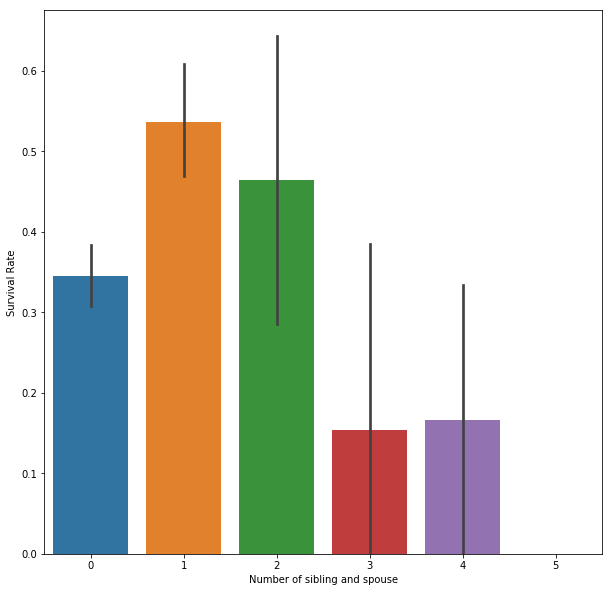

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x='SibSp',y='Survived',data=train_data)
plt.xlabel("Number of sibling and spouse")
plt.ylabel("Survival Rate")

In [21]:
train_data[['SibSp','Survived']].groupby('SibSp').mean()

Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.153846
4      0.166667
5      0.000000

"If the Sibling and the spouse is less than or equal to 2,then there is a higher chance of  survival.If it is greater than 2 then the probability of survival becomes less and even zero if having siblings spouse greater than 4" 

# 4.Finding Survival Rate for Parents and Children 

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survival Rate')

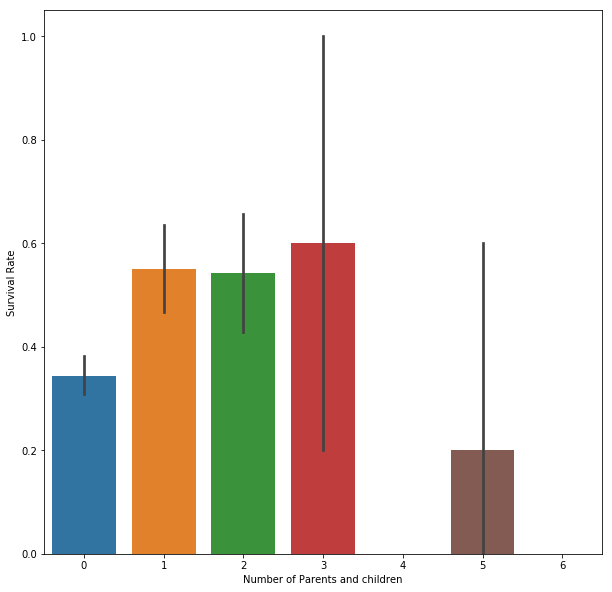

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x='Parch',y='Survived',data=train_data)
plt.xlabel("Number of Parents and children")
plt.ylabel("Survival Rate")

In [23]:
train_data[['Parch','Survived']].groupby('Parch').mean()

Survived
Parch          
0      0.343658
1      0.550847
2      0.542857
3      0.600000
4      0.000000
5      0.200000
6      0.000000

"Having 1 to 3 Children  has higher chances of survival more than that has less chances of survival" 

# 5. Survival rate for Gender  

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survival Rate')

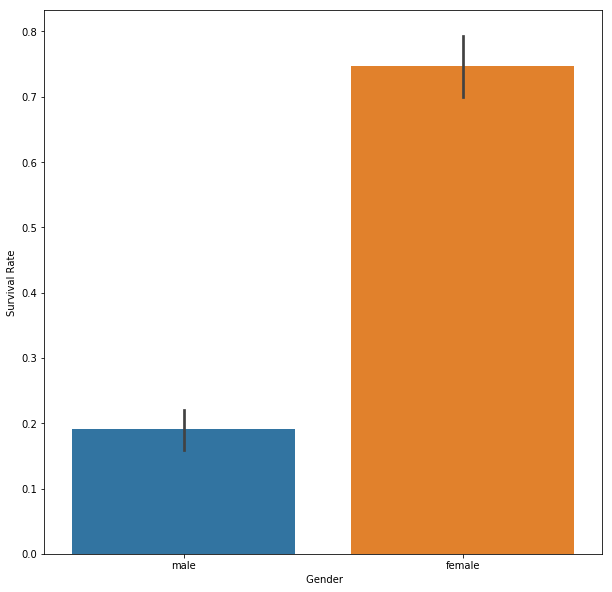

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='Sex',y='Survived',data =train_data)
plt.xlabel(" Gender")
plt.ylabel("Survival Rate")

In [25]:
train_data[['Sex','Survived']].groupby('Sex').mean()

Survived
Sex             
female  0.747573
male    0.190559

"There is more probability that women will survive than men" 

# 6. Survival Rate for Passenger Class

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survival Rate')

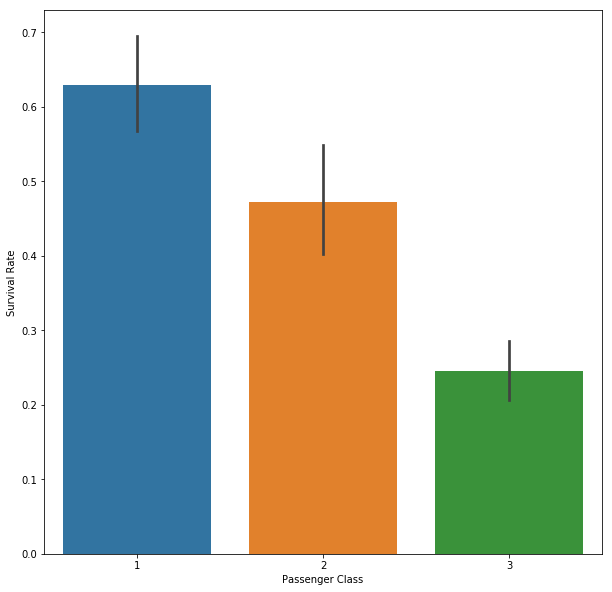

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x='Pclass',y='Survived',data =train_data)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

In [27]:
train_data[['Pclass','Survived']].groupby('Pclass').mean()

Survived
Pclass          
1       0.629108
2       0.472826
3       0.245868

"There is a higher chances that Higher passenger class will survive more and and rate of survival gradually decline as passenger class decreases" 

# 7. Survival Rate by Embarkment port 

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


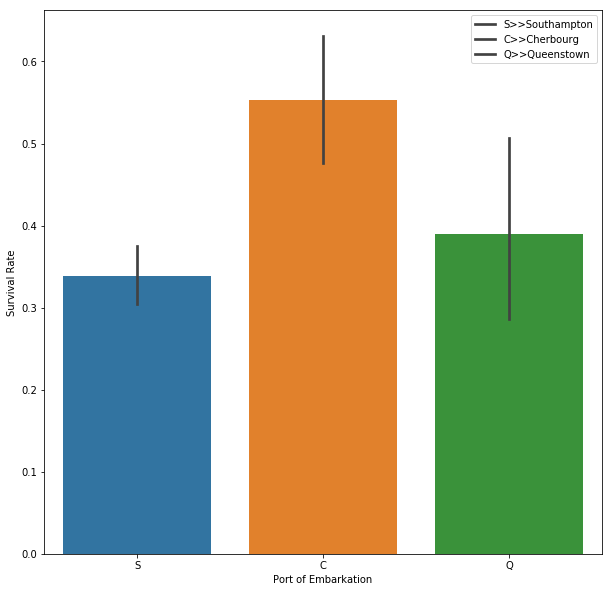

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x='Embarked',y='Survived',data=train_data) 
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.legend(['S>>Southampton','C>>Cherbourg','Q>>Queenstown'])

In [29]:
train_data[['Embarked','Survived']].groupby('Embarked').mean()

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339117

"Survived rate is higher for CherBourg and gradually decreases for Queenstown and Southampton"

"Adding sibling spouse and parents children to find the total number of family" 

In [30]:
train_data['Family_all'] = train_data['SibSp']+train_data['Parch']+1

In [31]:
train_data['Family_all'].describe()

count    881.000000
mean       1.818388
std        1.382086
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: Family_all, dtype: float64

# 8. Survival rate for total family member 

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survival Rate')

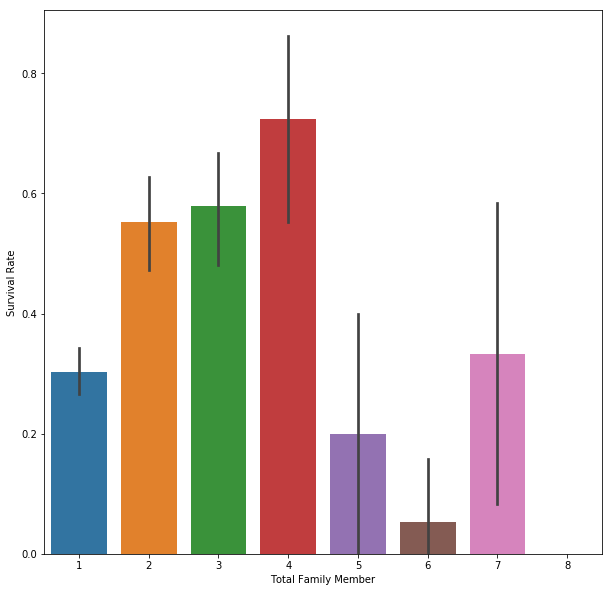

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(x='Family_all',y='Survived',data=train_data)
plt.xlabel("Total Family Member")
plt.ylabel("Survival Rate")

In [33]:
train_data[['Family_all','Survived']].groupby('Family_all').mean()

Survived
Family_all          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.052632
7           0.333333
8           0.000000

# 9. Histogram distribution of age 

/home/anish/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anish/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/anish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/anish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be

Text(0.5, 1.0, 'Histogram distribution of Age')

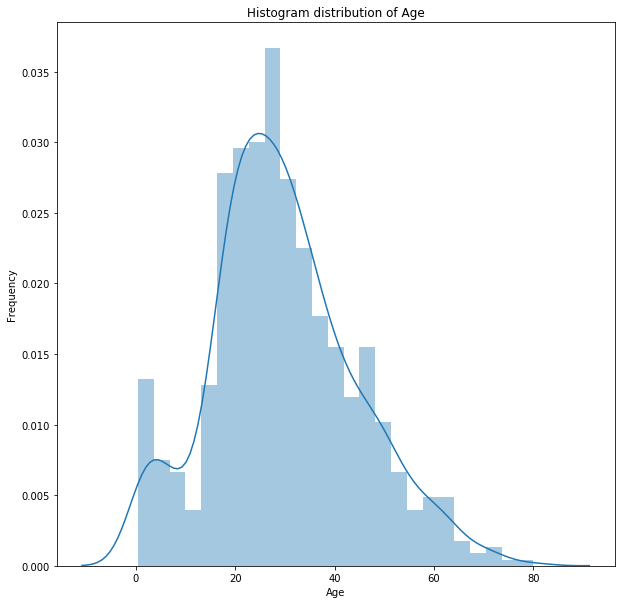

In [37]:
plt.figure(figsize=(10,10))
sns.distplot(train_data['Age'],bins=25)
plt.ylabel("Frequency")
plt.title("Histogram distribution of Age")

 "We can conlcude that majority of the age group lies between 20 to 40 "

# 10. Correlation of Features 

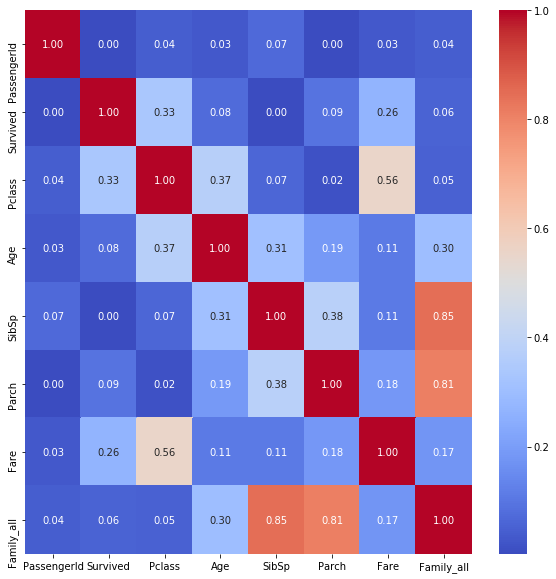

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(train_data.corr()),annot=True,fmt='0.2f',cmap='coolwarm')

"As we can see here Family size is correlated to Parch(Parents and children) and SibSp(Sibling and Spouse) as total family would be summation of Parch and SibSp including oneself.Secondly we conclude that Fare is slightly correlated to the Pclass(Passenger Class) as higher the passenger class expenisve the ticket would be."

# 11. KDEplot  for age distribution  

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


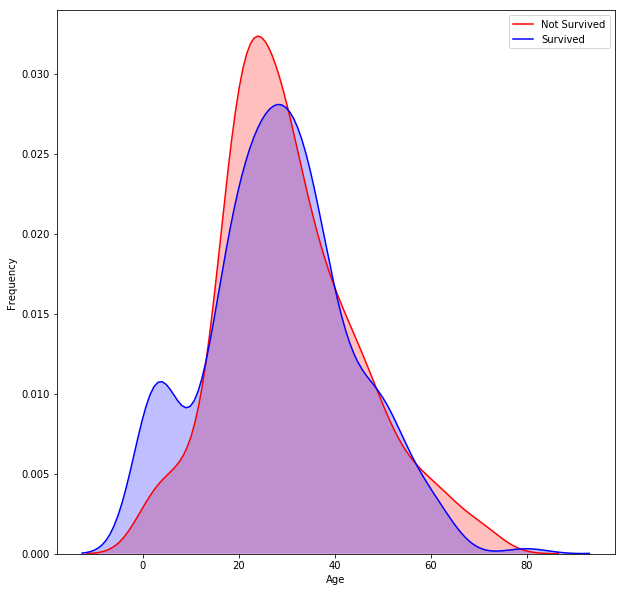

In [39]:
plt.figure(figsize=(10,10))
g=sns.kdeplot(train_data["Age"][(train_data['Survived']==0)&(train_data["Age"].notnull())],color="Red",shade=True)
g=sns.kdeplot(train_data['Age'][(train_data['Survived']==1)&(train_data['Age'].notnull())],color='Blue',shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived","Survived"])

"Here we can conlcude that More people survived betweeen the age of 0 to 16 and 35 to 40 and 50 to 59 than other age group"

# 12.  Survival Rate of Passenger class taking sex in account 

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survived Probability')

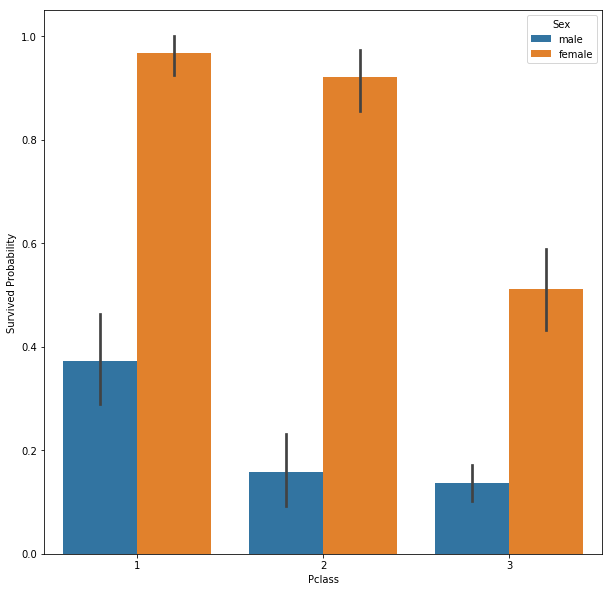

In [40]:
plt.figure(figsize=(10,10))
g=sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data)
g.set_ylabel("Survived Probability")

"Irrespective of the Pclass(Passengerclass) female has more chances of survival than male counterpart.Pclass plays a factor as higher class has higer survival rate" 

# 13.  Survival Rate from port of embarkment taking Passenger class as a parameter

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Survived Probability')

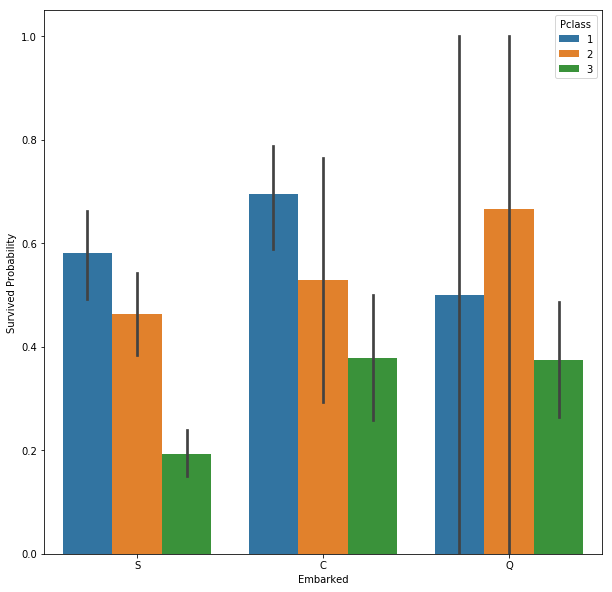

In [41]:
plt.figure(figsize=(10,10))
g=sns.barplot(x='Embarked',y='Survived',hue='Pclass',data=train_data)
g.set_ylabel("Survived Probability")

"In Queenstown second class passenger has more chances of survival rate than first class"

#  14 .Boxplot Ananlysis of Age taking features such  as sex,Pclass,Parch,Sibsp

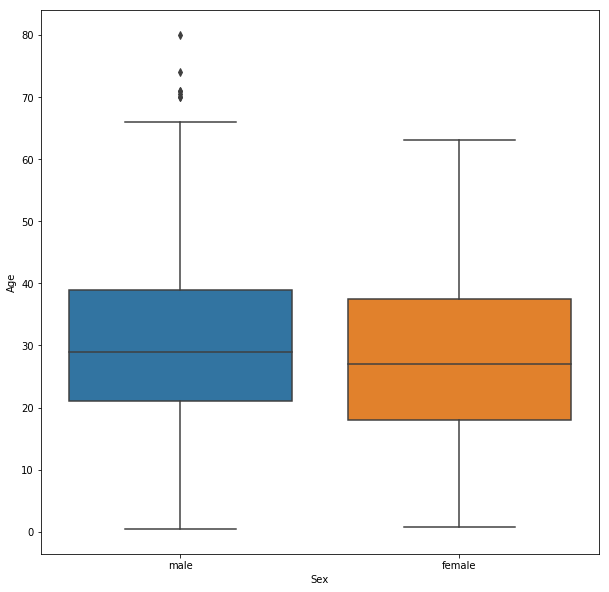

In [42]:
plt.figure(figsize=(10,10))
g = sns.boxplot(y="Age",x="Sex",data=train_data)

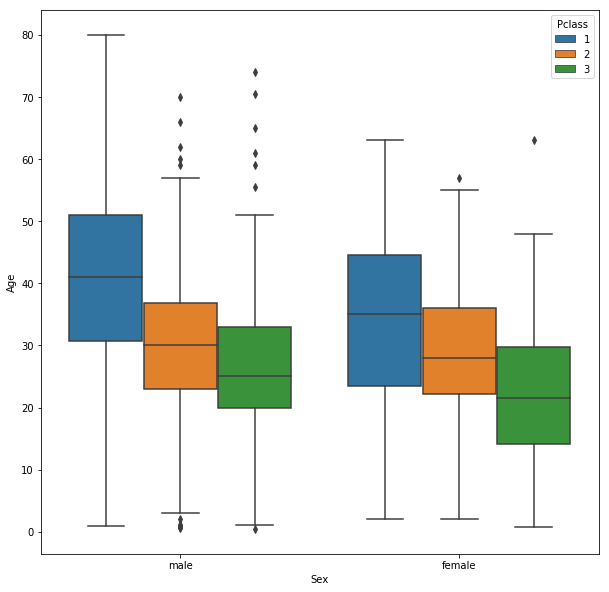

In [43]:
plt.figure(figsize=(10,10))
g = sns.boxplot(y="Age",x="Sex",hue="Pclass", data=train_data)

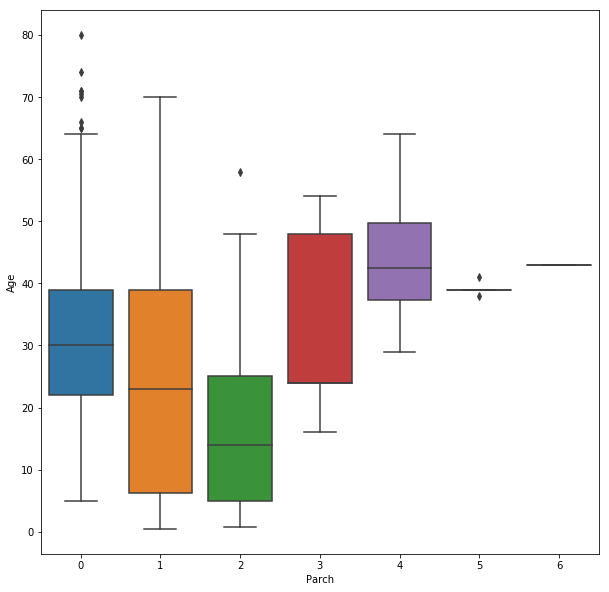

In [41]:
plt.figure(figsize=(10,10))
g = sns.boxplot(y="Age",x="Parch", data=train_data)

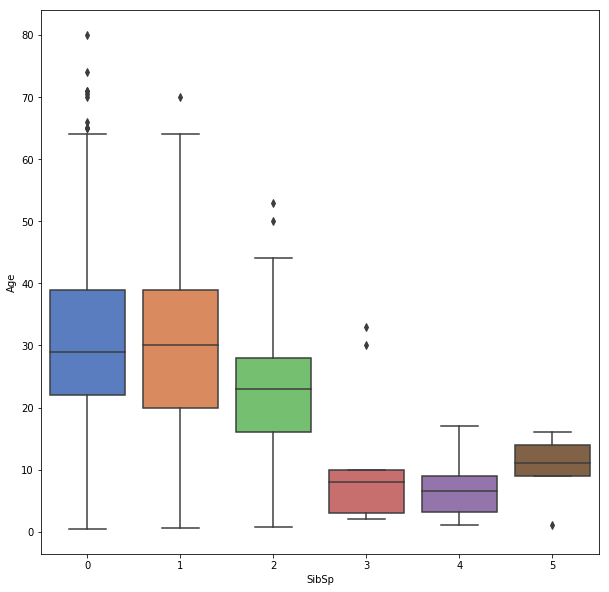

In [44]:
plt.figure(figsize=(10,10))
g = sns.boxplot(y="Age",x="SibSp", data=train_data,palette='muted')

# 15. Violin plot for survived and death passenger  taking age as parameter

/home/anish/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


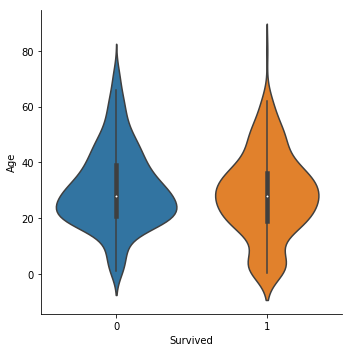

In [45]:
g=sns.factorplot(x='Survived',y='Age',data=train_data,kind='violin')

In [46]:
title=[]
for i in train_data['Name']:
    title.append(i.split(",")[1].split(".")[0])
train_data['Title']=pd.Series(title)

In [47]:
train_data['Title'].replace([' Mme',' Ms',' Mlle',' Mrs'],' Miss',inplace=True)

In [48]:
train_data['Title'].replace( [' Don', ' Rev', ' Dr', ' Major', ' Lady', ' Sir', ' Col', ' Capt',' the Countess', ' Jonkheer', ' Dona'],'Others',inplace=True)

# 16. Survival Rate according to the title 

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


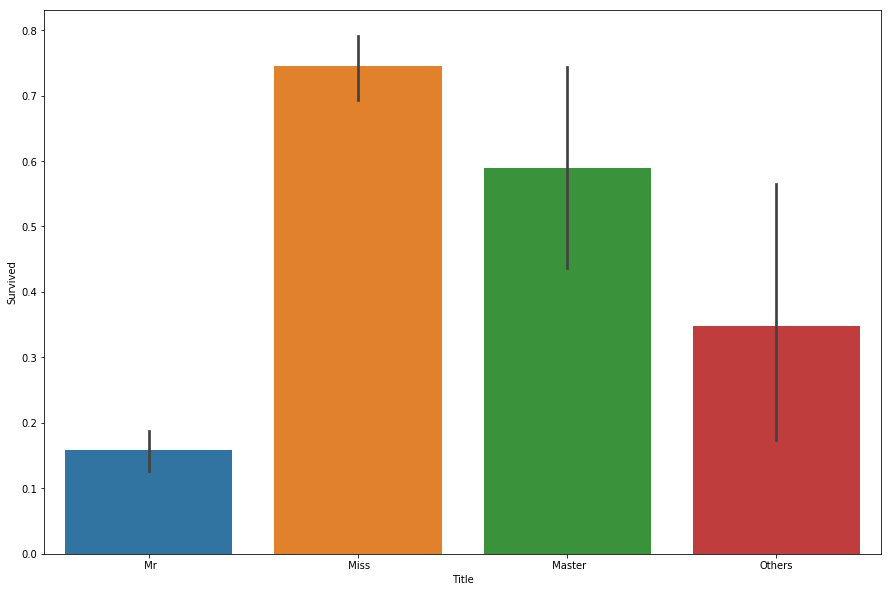

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x='Title',y='Survived',data=train_data)

"Miss and Master had higher chances of probabiblity to survive than Mister" 

In [50]:
train_data[['Title','Survived']].groupby('Title').mean()

Survived
Title            
 Master  0.589744
 Miss    0.745098
 Mr      0.157895
Others   0.347826

In [51]:
train_data['Cabin']=[i[0] if not pd.isnull(i) else 'X' for i in train_data['Cabin'] ]

In [52]:
train_data['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

# 17. Survival rate for Cabin group  

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


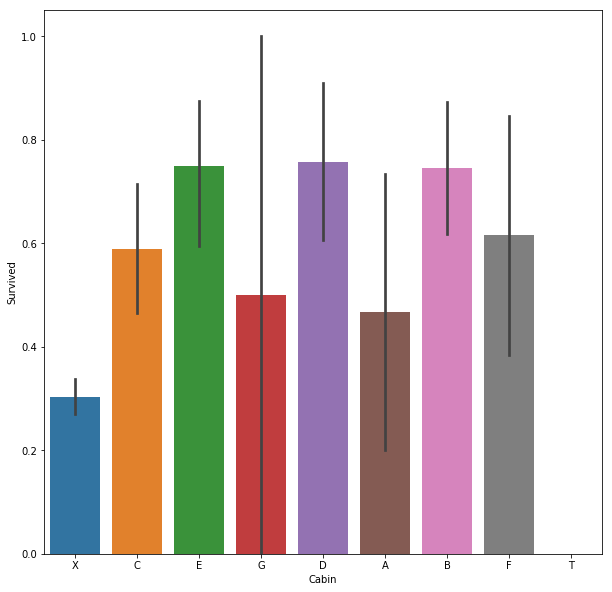

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(x='Cabin',y='Survived',data=train_data)

In [54]:
train_data[['Cabin','Survived']].groupby('Cabin').mean()

Survived
Cabin          
A      0.466667
B      0.744681
C      0.589286
D      0.757576
E      0.750000
F      0.615385
G      0.500000
T      0.000000
X      0.302941

"The passenger who had stayed in Cabin B,D,E,F has higher chances to survive than who stayed in other cabin" 

# 17.Scatter plot Age and Fare taking Survival into account 

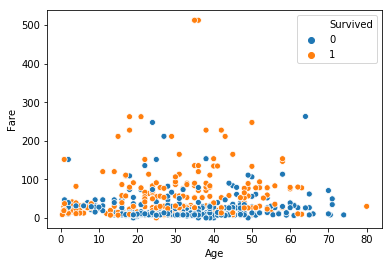

In [55]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=train_data)

Here we can figure it out that  more children survive regardless of fare and more the fare paid there is more chance to survive

In [57]:
Ticket=[]
for i in train_data.Ticket:
    if  not i.isdigit():
        Ticket.append(i.split(" ")[0])
    else:
        Ticket.append("X")

In [62]:
replace=[]
for i in Ticket:
    remove1=i.replace("/","")
    remove2=remove1.replace(".","")
    replace.append(remove2)
train_data['Ticket'] = pd.Series(replace)

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

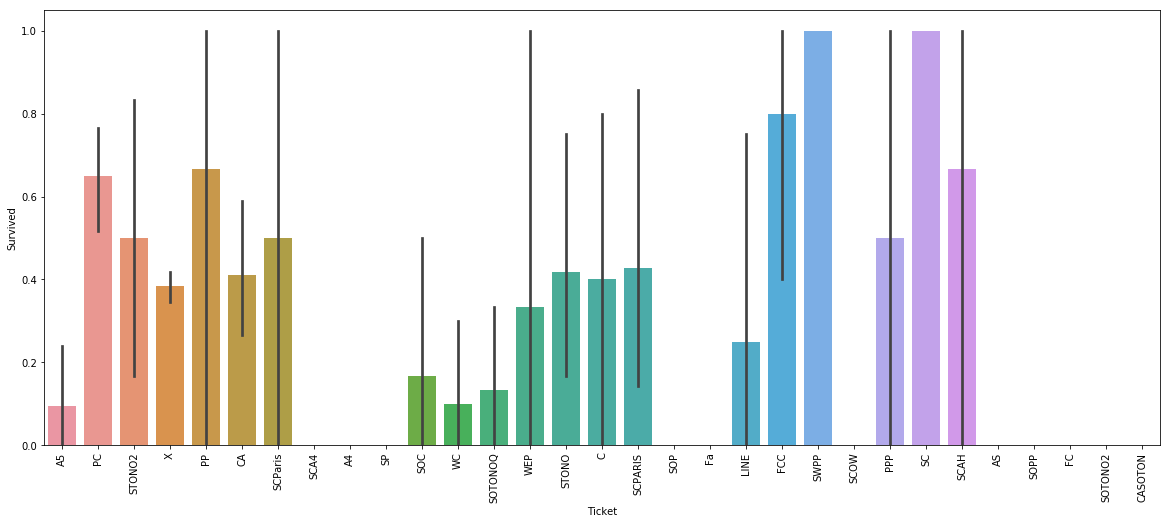

In [63]:
plt.figure(figsize=(20,8))
sns.barplot(x='Ticket',y='Survived',data=train_data)
plt.xticks(rotation=90)

Conclusions and Finding from Exploratory Data Ananlysis.

    • While finding the outlier, we can see that in Sibling spouse columns there is an outlier who has having 8 sibling and spouse which is very odd relative to the data,similarly where sibling spouse are small in number  the fare of the ticket is exorbitantly high.Hence both comes under outlier.
    • By plotting the feature which has null values we figure it out that Cabin,Age,Embarked are the features having many null value.
    • If the Sibling and the spouse is less than or equal to two,then there is a higher chance of survival.If it is greater than two then the probability of survival becomes less and even zero if having siblings spouse greater than four.
    • Having one  to three Children and parents  has higher chances of survival more than having less chances of survival.
    • There is more probability that women will survive than men.
    • There is a higher chances that Higher passenger class will survive more and and rate of survival gradually decline as passenger class decreases.
    • Survived rate is higher for CherBourg and gradually decreases for Queenstown and Southampton.
    • From the histogram plot of age,we can conlcude that majority of the age group lies between twenty to fourty.
    • As we can see in heatmap plot for correlation that family size is correlated to Parch(Parents and children) and SibSp(Sibling and Spouse) as total family would be summation of Parch and SibSp including oneself.Secondly we conclude that Fare is slightly correlated to the Pclass(Passenger Class) as higher the passenger class expenisve the ticket would be.
    • From the kde distribution plot,we can conlcude that more people survived betweeen the age of 0 to 16 , 35 to 40 and 50 to 59 than other age group.
    • Irrespective of the Pclass(Passengerclass) female has more chances of survival than male counterpart.Pclass plays a factor as higher class has higer survival rate.
    • There is a irony in survival rate in Queenstown,In Queenstown second class passenger has more chances of survival rate than first class.
    • As the passenger class increases(consider class one as higher class),the age of the passenger increases too irrespective of gender.
    • Age 20 to 30 has maximum survival and death too.
    • Miss and master had higher chances of probabiblity to survive than mister.
    • The passenger who had stayed in Cabin B,D,E,F has higher chances to survive than who stayed in other cabin,Cabin X(which doesnot have recorded cabin number) has least chance of survival.
    • From the scatter plot between the age  and fare and tracking the survival rate,we  figure  out that  more children survive regardless of fare and more the fare paid there is more chance to survival.